In [1]:
# Import NumPy for numerical operations
import numpy as np

# Import Pandas for data manipulation
import pandas as pd

#Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import Seaborn for enhanced data visualizations
import seaborn as sns

In [2]:
# Load the CSV files into a Pandas DataFrame
df = pd.read_csv('zx')

In [3]:
# Dataframe
df

,Roll Number,City,Age,Gender,cgpa,package
0,1,Bangalore,25,Female,6.89,3.26
1,2,Delhi,23,Female,5.12,1.98
2,3,Chennai,25,Male,7.82,3.25
3,4,Bangalore,26,Male,7.42,3.67
4,5,Kolkata,22,Female,6.94,3.57
...,...,...,...,...,...,...
1495,1496,Kolkata,23,Male,6.79,3.08
1496,1497,Bangalore,23,Female,5.83,2.42
1497,1498,Mumbai,23,Male,6.63,2.79
1498,1499,Hyderabad,26,Male,7.11,2.61


### Data Procession

In [5]:
df.shape

(1500, 6)

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [7]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [8]:
df.count()

Roll Number    1500
City           1500
Age            1500
Gender         1500
cgpa           1500
package        1500
dtype: int64

In [9]:
# Check for the missing values in the DataFrame
df.isnull()

,Roll Number,City,Age,Gender,cgpa,package
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1495,False,False,False,False,False,False
1496,False,False,False,False,False,False
1497,False,False,False,False,False,False
1498,False,False,False,False,False,False


In [10]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()

Roll Number    0
City           0
Age            0
Gender         0
cgpa           0
package        0
dtype: int64

In [11]:
df.head()

,Roll Number,City,Age,Gender,cgpa,package
0,1,Bangalore,25,Female,6.89,3.26
1,2,Delhi,23,Female,5.12,1.98
2,3,Chennai,25,Male,7.82,3.25
3,4,Bangalore,26,Male,7.42,3.67
4,5,Kolkata,22,Female,6.94,3.57


In [12]:
# Calculate the mean (average) CGPA from the 'cgpa' column
df['cgpa'].mean()

6.989806666666667

In [13]:
df['package'].mean()

2.995226666666667

In [14]:
df.columns

Index(['Roll Number', 'City', 'Age', 'Gender', 'cgpa', 'package'], dtype='object')

In [15]:
df['Gender'].value_counts()

Gender
Male      761
Female    739
Name: count, dtype: int64

### graph ploting

<Axes: xlabel='Age', ylabel='count'>

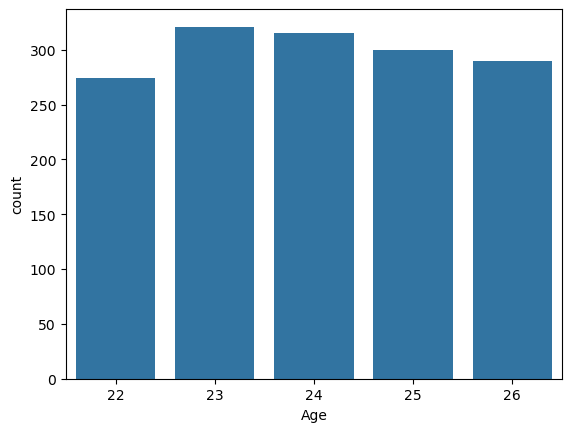

In [17]:
# Create a count plot of 'Age' column using Seaborn
sns.countplot(x=df['Age'])

<Axes: xlabel='Gender', ylabel='count'>

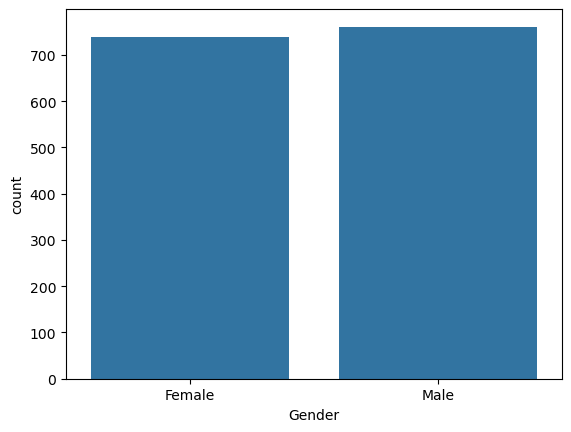

In [18]:
sns.countplot(x=df['Gender'])

Text(0, 0.5, 'package')

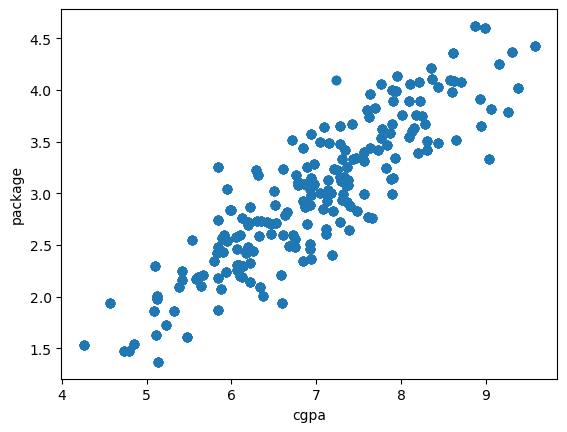

In [19]:
# Create a scatter plot of CGPA vs. package
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [20]:
x = df.iloc[:, 4:5]  # Feature(s)
y = df.iloc[:, -1]  # Target variable

In [21]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Scale the columns 'cgpa' and 'package'
# df[['cgpa', 'package']] = scaler.fit_transform(df[['cgpa', 'package']])

In [22]:
df.package

0       3.26
1       1.98
2       3.25
3       3.67
4       3.57
        ... 
1495    3.08
1496    2.42
1497    2.79
1498    2.61
1499    2.84
Name: package, Length: 1500, dtype: float64

In [23]:
df

,Roll Number,City,Age,Gender,cgpa,package
0,1,Bangalore,25,Female,6.89,3.26
1,2,Delhi,23,Female,5.12,1.98
2,3,Chennai,25,Male,7.82,3.25
3,4,Bangalore,26,Male,7.42,3.67
4,5,Kolkata,22,Female,6.94,3.57
...,...,...,...,...,...,...
1495,1496,Kolkata,23,Male,6.79,3.08
1496,1497,Bangalore,23,Female,5.83,2.42
1497,1498,Mumbai,23,Male,6.63,2.79
1498,1499,Hyderabad,26,Male,7.11,2.61


### Spliting the data into train, test.

In [25]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [26]:
# Import LinearRegression form scikit-learn and fit the model to the training data
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Creating a Linear Regression model
lr.fit(x_train,y_train) # Train the model using training data

LinearRegression()

Text(0, 0.5, 'Package')

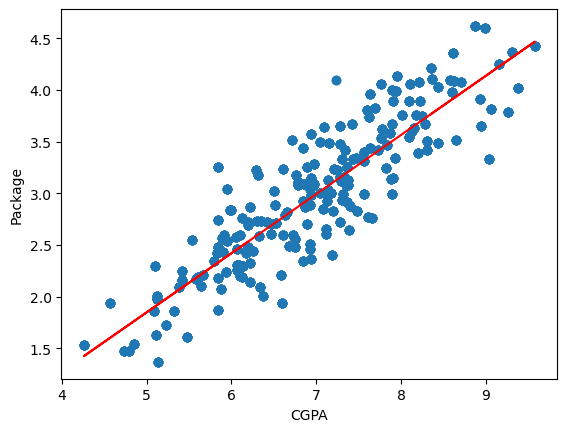

In [27]:
# Create a scater plot of CGPA vs. package and add a regression line
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test, lr.predict(x_test),color='red')# Regression line based on prediction
plt.xlabel('CGPA')
plt.ylabel('Package')

In [28]:
accuracy = lr.score(x_train, y_train)
accuracy

0.7747398878218645

In [29]:
# Making a prediction using the trained moodel for an input value 
lr.predict([[10]])

C:\Users\prade\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.70825322])